In [4]:
%pip install -q --proxy http://proxy:80 pycls iopath tqdm

Note: you may need to restart the kernel to use updated packages.


In [1]:
import sys
sys.path.append("../")
from evaluation import main
from data_processor import DataProcessor
from search_space.RegNet import RegNet
import torch
#from search_space.config import cfg, load_cfg

/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import random
import numpy as np
import time
from IPython.display import clear_output
random_seed = 42
random.seed(random_seed)
# Set seed for NumPy
np.random.seed(random_seed)
# Set seed for PyTorch
torch.manual_seed(random_seed)
torch.cuda.manual_seed_all(random_seed)
# Additional steps if using CuDNN (optional, for GPU acceleration)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [3]:
#Dataset must be in the folder datasets
(train_x, train_y), (valid_x, valid_y), (test_x), metadata = main.load_datasets("AddNIST", truncate=False)
metadata["rand_augment"]=False
data_processor = DataProcessor(train_x, train_y, valid_x, valid_y, test_x, metadata)
train_loader, valid_loader, test_loader = data_processor.process()

[RandomCrop(size=(28, 28), padding=[4, 4, 4, 4], pad_if_needed=False, fill=0, padding_mode=constant), RandomHorizontalFlip(p=0.5)]
[Normalize(mean=[tensor(0.0053), tensor(0.0066), tensor(0.0077)], std=[tensor(1.0065), tensor(1.0080), tensor(1.0092)], inplace=False)]
[Normalize(mean=[tensor(0.0053), tensor(0.0066), tensor(0.0077)], std=[tensor(1.0065), tensor(1.0080), tensor(1.0092)], inplace=False)]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


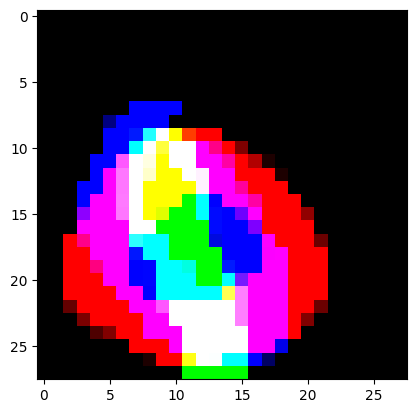

In [4]:
import matplotlib.pyplot as plt
img=next(iter(train_loader))[0][0]
img=img.numpy().transpose(1, 2, 0)
plt.imshow(img)

In [4]:
metadata

{'num_classes': 20,
 'input_shape': [50000, 3, 28, 28],
 'codename': 'Adaline',
 'benchmark': 89.85,
 'rand_augment': True}

In [13]:
space_regnet=RegNet(metadata, W0=[16, 64, 8], WA=[8, 48, 8],WM=[2.05,2.9,0.05],D=[8,22,1])

In [15]:
!rm -rf "tests_filtered_regnet"

In [14]:
#WA,W0,WM,DEPTH=48,24,2.4,12
#model, info=space_regnet.create_model(params=[WA,W0,WM,DEPTH], save_folder=None, name=None, gen=None)
#model,info=space_regnet.load_model(config_file="tests_one_model/Generation_1_SE/spectral_hare/config.yaml")
models, chromosomes=space_regnet.create_random_generation(save_folder="tests_filtered_regnet",gen=1, size=20)
#models, chromosomes=space_regnet.load_generation(folder="tests_one_model/Generation_1_SE")

Created model:  ludicrous_foxhound
res_bottleneck_block
res_bottleneck_block
Created model:  inquisitive_numbat
res_bottleneck_block
res_bottleneck_block
Created model:  almond_honeybee
res_bottleneck_block
res_bottleneck_block
Created model:  capable_bullfinch
res_bottleneck_block
res_bottleneck_block
Created model:  succinct_sloth
res_bottleneck_block
res_bottleneck_block
Corrected W0:  32
Created model:  umber_puma
res_bottleneck_block
res_bottleneck_block
Corrected W0:  40
Created model:  xanthic_markhor
res_bottleneck_block
res_bottleneck_block
Created model:  tough_goose
res_bottleneck_block
res_bottleneck_block
Created model:  steel_rook
res_bottleneck_block
res_bottleneck_block
Created model:  amorphous_earthworm
res_bottleneck_block
res_bottleneck_block
Corrected W0:  32
Created model:  private_earwig
res_bottleneck_block
res_bottleneck_block
Corrected W0:  56
Created model:  nimble_petrel
res_bottleneck_block
res_bottleneck_block
Created model:  emerald_zebu
res_bottleneck_bl

In [9]:
chromosomes

{'olive_wasp': {'ws': [8, 72, 144, 288, 592, 1216],
  'bs': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
  'gs': [8, 8, 8, 8, 8, 8],
  'ds': [1, 1, 3, 4, 9, 2],
  'num_stages': 6,
  'total_size_mb': None,
  'h': 1,
  'w': 1,
  'flops': 2891040,
  'params': 16601152,
  'acts': 11584,
  'WA': 48.0,
  'W0': 8,
  'WM': 2.05,
  'DEPTH': 20},
 'hospitable_pronghorn': {'ws': [40, 80, 176, 368],
  'bs': [1.0, 1.0, 1.0, 1.0],
  'gs': [8, 8, 8, 8],
  'ds': [1, 3, 5, 8],
  'num_stages': 4,
  'total_size_mb': None,
  'h': 1,
  'w': 1,
  'flops': 625946,
  'params': 3458714,
  'acts': 5146,
  'WA': 24.0,
  'W0': 40,
  'WM': 2.0999999999999996,
  'DEPTH': 17},
 'spectral_hare': {'ws': [56, 128, 280, 640],
  'bs': [1.0, 1.0, 1.0, 1.0],
  'gs': [8, 8, 8, 8],
  'ds': [1, 3, 6, 4],
  'num_stages': 4,
  'total_size_mb': None,
  'h': 1,
  'w': 1,
  'flops': 1008582,
  'params': 5639414,
  'acts': 5798,
  'WA': 40.0,
  'W0': 56,
  'WM': 2.249999999999999,
  'DEPTH': 14},
 'loyal_tiger': {'ws': [24, 64, 168],
  'bs': [1

In [7]:
from trainer import Trainer, TrainerDistillation
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [9]:
trainer=Trainer(model, device, train_loader, valid_loader, metadata)

In [10]:
model_trained=trainer.train()

0.01
	Epoch   1/2   | Train Acc:  10.74% | Valid Acc:  15.91% | T/Epoch: 52.14s  |
0.005
	Epoch   2/2   | Train Acc:  18.08% | Valid Acc:  20.00% | T/Epoch: 48.92s  |
  Total runtime: 1m,37s


In [8]:
for student in list(models.keys())[1:5]:
    clear_output(wait=True)
    metadata["experiment_name"]=f"tests_one_model/Generation_1_NOSE_D_DropPath/{student}"
    trainer=TrainerDistillation(models[student], device, train_loader, valid_loader, metadata)
    trainer.train()

[TRAIN] Epoch:1| Time(data):0.000| Time(train):0.048| Loss:2.9850| Top-1:7.841| Top-5:34.091: 100%|██████████| 703/703 [00:52<00:00, 13.29it/s]
[EVAL] Top-1:14.040| Top-5:51.247: 100%|██████████| 235/235 [00:06<00:00, 38.98it/s]
[TRAIN] Epoch:2| Time(data):0.000| Time(train):0.049| Loss:2.5776| Top-1:14.700| Top-5:53.138: 100%|██████████| 703/703 [00:53<00:00, 13.14it/s]
[EVAL] Top-1:19.020| Top-5:61.007: 100%|██████████| 235/235 [00:05<00:00, 39.77it/s]
[TRAIN] Epoch:3| Time(data):0.000| Time(train):0.048| Loss:2.4312| Top-1:17.950| Top-5:59.102: 100%|██████████| 703/703 [00:52<00:00, 13.29it/s]
[EVAL] Top-1:20.660| Top-5:63.633: 100%|██████████| 235/235 [00:05<00:00, 39.69it/s]
[TRAIN] Epoch:4| Time(data):0.000| Time(train):0.047| Loss:2.3330| Top-1:20.786| Top-5:62.718: 100%|██████████| 703/703 [00:53<00:00, 13.19it/s]
[EVAL] Top-1:22.233| Top-5:65.853: 100%|██████████| 235/235 [00:06<00:00, 38.10it/s]
[TRAIN] Epoch:5| Time(data):0.000| Time(train):0.047| Loss:2.2425| Top-1:23.691| 

[EVAL] Best accuracy:63.71333312988281
